#### **Importing Libraries**

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

sns.set(style='whitegrid', font_scale=1.2)

#### **Loading Data**

In [2]:
# Creating study_data.csv

if not os.path.exists('study_data.csv'):
    # Loading the data
    folders = os.listdir('./')
    folders = [f for f in folders if f in ['Anne', 'kishore', 'varun', 'vismaya']]

    df = pd.DataFrame()
    for folder in folders:
        subfolders = os.listdir(f'./{folder}')
        for file_folder in subfolders:
            files = os.listdir(f'./{folder}/{file_folder}')
            filename = [f for f in files if 'overall' in f][0]
            temp = pd.read_csv(f'./{folder}/{file_folder}/{filename}')
            df = pd.concat([df, temp])
    df.to_csv('study_data.csv', index=False)


In [11]:
df = pd.read_csv('study_data.csv')
df = df.rename(columns={
    'Participant Code': 'participant_code', 
    'Session Code': 'session_code',
    'Condition Code': 'condition_code',
    'Pointing Device': 'pointing_device',
    'Hand Dominance': 'hand_dominance',
    'Mean Completion Time (ms)': 'mean_completion_time',
    'Mean Click Error (%)': 'mean_click_error',
    'Mean Throughput (bps)': 'mean_throughput'
})
df.head()

,participant_code,session_code,condition_code,hand_dominance,pointing_device,Device Experience,mean_completion_time,mean_click_error,mean_throughput
0,P1,S1,C2,Dominant,Touchpad,Intermediate,981.006667,46.666667,0.459332
1,P1,S1,C3,Non-Dominant,Touchpad,Intermediate,1257.633333,33.333333,0.413364
2,P1,S0,C3,Non-Dominant,Touchpad,Intermediate,1422.720000,46.666667,0.370463
3,P1,S0,C2,Dominant,Touchpad,Intermediate,955.373333,80.000000,0.342151
4,P1,S2,C1,Non-Dominant,Mouse,Intermediate,1192.833333,6.666667,2.833183


#### **Visualizing Data**

/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/4093282734.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/4093282734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/4093282734.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/4093282734.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


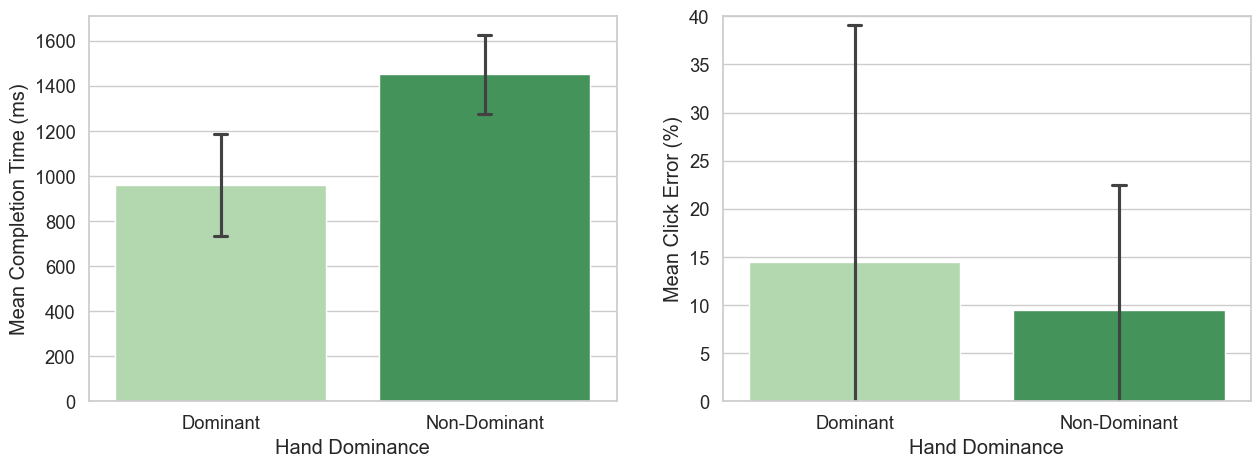

In [4]:
# Visualizing the effect of hand dominance on mean completion time and mean click error

# Creating two subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mean completion time by hand-dominance
sns.barplot(
    ax=axes[0],
    data=df, 
    x='hand_dominance', 
    y='mean_completion_time', 
    ci='sd', 
    capsize=.05, 
    order=['Dominant', 'Non-Dominant'],
    palette='Greens'
)
axes[0].set_xlabel('Hand Dominance')
axes[0].set_ylabel('Mean Completion Time (ms)')

# Mean error rate by hand-dominance
plt.gca().set_ylim(bottom=0, top=40) # Hiding negative StD values
sns.barplot(
    ax=axes[1],
    data=df, 
    x='hand_dominance', 
    y='mean_click_error', 
    ci='sd', 
    capsize=.05, 
    order=['Dominant', 'Non-Dominant'],
    palette='Greens'
)
axes[1].set_xlabel('Hand Dominance')
axes[1].set_ylabel('Mean Click Error (%)')

plt.show()

/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/2790944608.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/2790944608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/2790944608.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/2790944608.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Mean Click Error (%)')

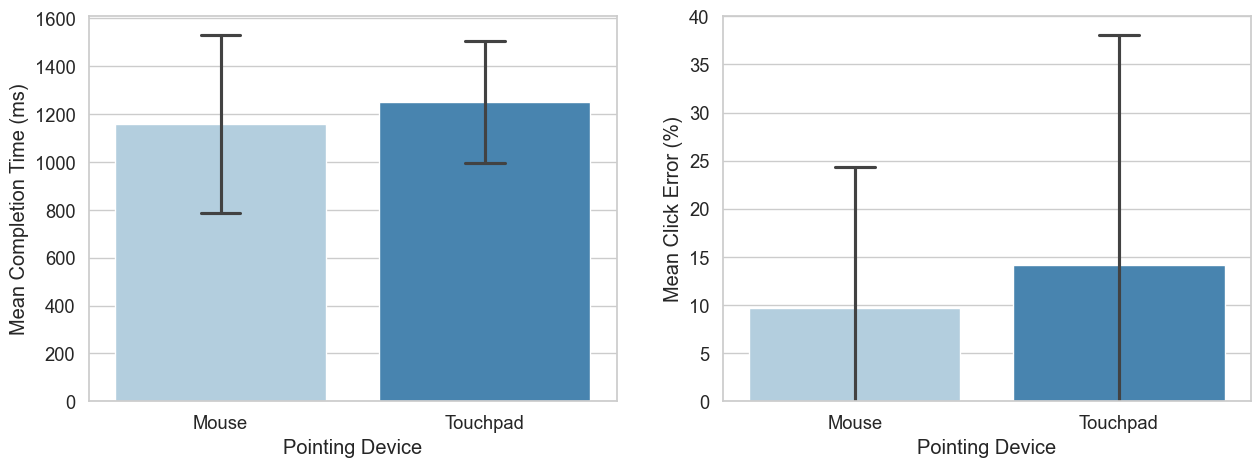

In [14]:
# Visualizing the effect of pointer type on mean completion time and mean click error

# Creating two subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mean completion time by session code
sns.barplot(
    ax=axes[0],
    data=df, 
    x='pointing_device', 
    y='mean_completion_time',
    ci='sd', 
    capsize=.15, 
    order=['Mouse', 'Touchpad'],
    palette='Blues'
)
axes[0].set_xlabel('Pointing Device')
axes[0].set_ylabel('Mean Completion Time (ms)')

# Mean error rate by session code
plt.gca().set_ylim(bottom=0, top=40) # Hiding negative StD values
sns.barplot(
    ax=axes[1],
    data=df, 
    x='pointing_device', 
    y='mean_click_error', 
    ci='sd', 
    capsize=.15, 
    order=['Mouse', 'Touchpad'],
    palette='Blues'
)
axes[1].set_xlabel('Pointing Device')
axes[1].set_ylabel('Mean Click Error (%)')

/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/353719854.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/353719854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/353719854.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/9c/jhh135zx0f1cs_d83ztt5w480000gn/T/ipykernel_65270/353719854.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Mean Click Error (%)')

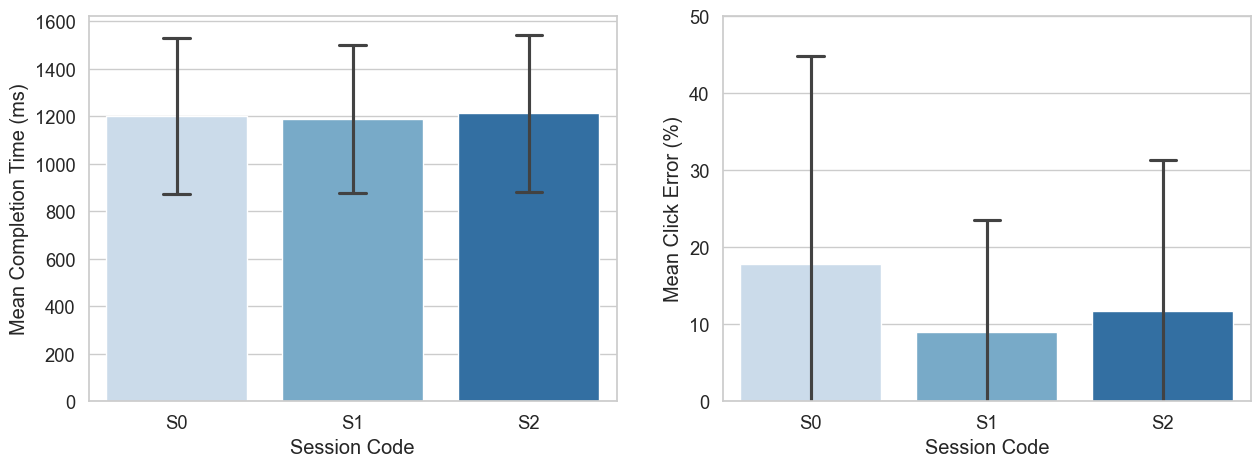

In [9]:
# Visualizing the effect of sessions on mean completion time and mean click error

# Creating two subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mean completion time by session code
sns.barplot(
    ax=axes[0],
    data=df, 
    x='session_code', 
    y='mean_completion_time',
    ci='sd', 
    capsize=.15, 
    order=['S0', 'S1', 'S2'],
    palette='Blues'
)
axes[0].set_xlabel('Session Code')
axes[0].set_ylabel('Mean Completion Time (ms)')

# Mean error rate by session code
plt.gca().set_ylim(bottom=0, top=50) # Hiding negative StD values
sns.barplot(
    ax=axes[1],
    data=df, 
    x='session_code', 
    y='mean_click_error', 
    ci='sd', 
    capsize=.15, 
    order=['S0', 'S1', 'S2'],
    palette='Blues'
)
axes[1].set_xlabel('Session Code')
axes[1].set_ylabel('Mean Click Error (%)')

#### **Two-Way ANOVA/TukeyHSD on Mean Completion Time**

In [17]:
# Two-way ANOVA for mean completion time
time_model = ols('mean_completion_time ~ C(hand_dominance) + C(pointing_device) + C(hand_dominance):C(pointing_device)', data=df).fit()
display(sm.stats.anova_lm(time_model, typ=2))


,sum_sq,df,F,PR(>F)
C(hand_dominance),2.908387e+06,1.0,86.586069,5.868422e-12
C(pointing_device),1.003115e+05,1.0,2.986391,9.098031e-02
C(hand_dominance):C(pointing_device),3.182990e+05,1.0,9.476132,3.577646e-03
Residual,1.477940e+06,44.0,NaN,NaN


In [18]:
# TukeyHSD for mean completion time
tukey_hand = pairwise_tukeyhsd(endog=df['mean_completion_time'], groups=df['hand_dominance'], alpha=0.05)
tukey_session = pairwise_tukeyhsd(endog=df['mean_completion_time'], groups=df['pointing_device'], alpha=0.05)
tukey_hand_session = pairwise_tukeyhsd(endog=df['mean_completion_time'], groups=df['hand_dominance'] + df['pointing_device'], alpha=0.05)
print(tukey_hand)
print()
print(tukey_session)
print()
print(tukey_hand_session)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2    meandiff p-adj  lower    upper   reject
-------------------------------------------------------------
Dominant Non-Dominant 492.3064   0.0 374.3194 610.2933   True
-------------------------------------------------------------

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1  group2  meandiff p-adj   lower    upper   reject
--------------------------------------------------------
 Mouse Touchpad  91.4292 0.3272 -94.4002 277.2585  False
--------------------------------------------------------

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------
    DominantMouse     DominantTouchpad 254.2939 0.0076     54.52 454.0677   True
    DominantMouse    Non-DominantMouse 655.1711    0.0  455.3973  854.945   Tru

#### **Two-Way ANOVA/TukeyHSD on Mean Click Error**

In [19]:
# Two-way ANOVA for mean click error
error_model = ols('mean_click_error ~ C(hand_dominance) + C(pointing_device) + C(hand_dominance):C(pointing_device)', data=df).fit()
display(sm.stats.anova_lm(error_model, typ=2))

,sum_sq,df,F,PR(>F)
C(hand_dominance),300.000000,1.0,0.749054,0.391470
C(pointing_device),237.037037,1.0,0.591845,0.445817
C(hand_dominance):C(pointing_device),59.259259,1.0,0.147961,0.702344
Residual,17622.222222,44.0,NaN,NaN


In [20]:
# TukeyHSD for mean click error
tukey_hand = pairwise_tukeyhsd(endog=df['mean_click_error'], groups=df['hand_dominance'], alpha=0.05)
tukey_session = pairwise_tukeyhsd(endog=df['mean_click_error'], groups=df['pointing_device'], alpha=0.05)
tukey_hand_session = pairwise_tukeyhsd(endog=df['mean_click_error'], groups=df['hand_dominance'] + df['pointing_device'], alpha=0.05)
print(tukey_hand)
print()
print(tukey_session)
print()
print(tukey_hand_session)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Dominant Non-Dominant     -5.0 0.3847 -16.4684 6.4684  False
------------------------------------------------------------

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 Mouse Touchpad   4.4444 0.4401 -7.0441 15.933  False
-----------------------------------------------------

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2        meandiff p-adj   lower    upper  reject
------------------------------------------------------------------------------
    DominantMouse     DominantTouchpad   6.6667 0.8466 -15.1476 28.4809  False
    DominantMouse    Non-DominantMouse  -2.7778 0.9863  -24.592 19.0365  False
    DominantMouse Non-Domina